# Dealing with inbalanced Dataset

We have a dataset in realisitc proportion, we could oversemple but it will not be good.

We have a lot of IBD events created by Andrea and also a lot of radioactivity events. If we sort them in temporal order we get that there will be a little amount of IBD in all the radioactivity events, because it is more frequently have radioactivity events respect of IBD that are rare. 

So in order to train our ML-algorithm we could use generated IBD events and generated Radioactivity events, so in that cse we have basically the same amount of data and the inbalanced problem will disappear. After the training, we test with inbalaced dataset.

Basically we use a smote 

We will se if it works... -> It worked!

# Loading data

In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# file_all_features = up.open("Data/all_feature.root")
# all_feature = file_all_features['all_feature'].arrays(library = 'np')

In [3]:
all_feature = pd.read_csv("../../../../mnt/fcufino/all_features.csv")

## Checking the dataset size

(array([1000081., 1468385.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

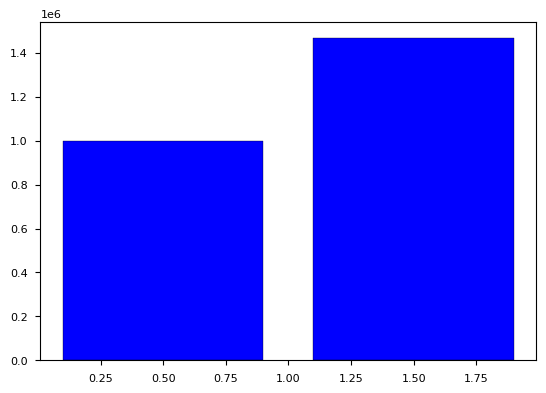

In [4]:
#plot a hist that counts the IBD and BKG
plt.hist(all_feature['Label'], bins = 2, range = (0,2), histtype = 'bar', rwidth = 0.8, color = 'b', label = 'BKG')




# Balancing the dataset

In [5]:
print("BKG: ", all_feature["delta_time"][all_feature['Label']==0].shape[0])
print("IBD: ", all_feature["delta_time"][all_feature['Label']==1].shape[0]) 

BKG:  1000081
IBD:  1468385


Sotto per mostrare che nel dataset BKG ci sono anche IBD non correlati

In [6]:
print(all_feature['Source'][all_feature["Label"]==0].unique())

[0. 1.]


In [7]:
for key in all_feature.keys():
    print(key)
print(all_feature.keys())

E_pro
delta_radius
Label
E_del
R_delayed
delta_time
R_prompt
Source
Index(['E_pro', 'delta_radius', 'Label', 'E_del', 'R_delayed', 'delta_time',
       'R_prompt', 'Source'],
      dtype='object')


In [8]:
# Elimina gli elementi desiderati dal dataset
num_IBD = all_feature["delta_time"][all_feature['Label']==1].shape[0]
num_BKG = all_feature["delta_time"][all_feature['Label']==0].shape[0]

del_BKG = 0
del_IBD = 0

if num_IBD > num_BKG:
    del_IBD = num_IBD - num_BKG
    to_del_ibd = all_feature.shape[0] - del_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[:to_del_ibd]

elif num_IBD < num_BKG:
    del_BKG = num_BKG - num_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[del_BKG:]

print("BKG:", all_feature["Label"][all_feature['Label']==0].shape[0]) 
print("IBD:",  all_feature["Label"][all_feature['Label']==1].shape[0])

BKG: 1000081
IBD: 1000081


# Plots

In [9]:
print(np.logical_and(all_feature["E_pro"] > 100 , True).sum())
print(np.logical_and(all_feature["E_del"] > 100 , True).sum())

64
68


In [10]:
all_feature.describe()

,E_pro,delta_radius,Label,E_del,R_delayed,delta_time,R_prompt,Source
count,2.000162e+06,2.000162e+06,2000162.0,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06
mean,2.142118e+00,1.059980e+04,0.5,1.534151e+00,1.424177e+04,3.807990e+05,1.424987e+04,5.033117e-01
std,2.157978e+00,1.147984e+04,0.5,1.647265e+00,3.496881e+03,3.145566e+05,3.486147e+03,4.999892e-01
min,0.000000e+00,6.084932e-01,0.0,0.000000e+00,0.000000e+00,6.400000e+02,3.947012e-06,0.000000e+00
25%,5.691091e-01,3.316806e+02,0.0,5.678132e-01,1.220154e+04,1.106400e+05,1.220738e+04,0.000000e+00
50%,1.796610e+00,2.045694e+03,0.5,2.131900e+00,1.531965e+04,2.887090e+05,1.532872e+04,1.000000e+00
75%,3.291638e+00,2.113910e+04,1.0,2.219660e+00,1.739900e+04,6.109250e+05,1.739900e+04,1.000000e+00
max,3.913881e+02,3.479771e+04,1.0,3.913881e+02,1.740007e+04,1.099999e+06,1.740007e+04,1.000000e+00


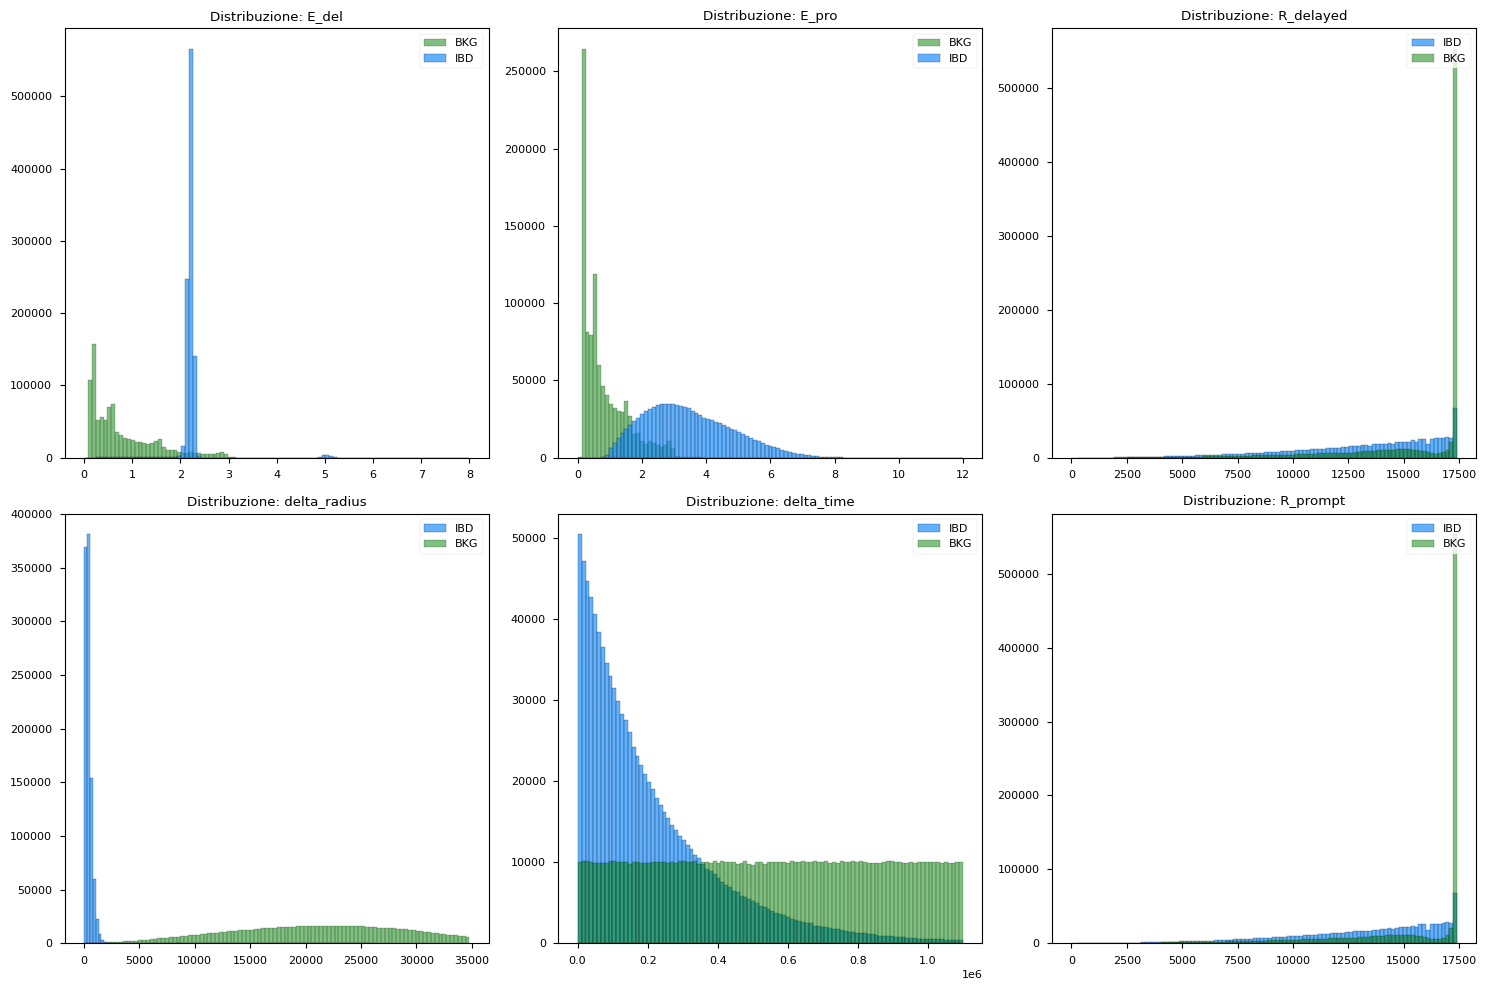

In [11]:
features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]
# Definisci le dimensioni della griglia dei subplot
num_rows = 2  # Numero di righe
num_cols = 3  # Numero di colonne

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera attraverso tutte le features
for idx, feature in enumerate(features):
    # Calcola gli indici della riga e della colonna corrente
    row = idx // num_cols
    col = idx % num_cols

    # Seleziona l'asse corrispondente alla riga e alla colonna corrente
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    if feature == "E_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,8,100), color='green',alpha = 0.5, label='BKG')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,8,100), color='dodgerblue',alpha = 0.7, label='IBD')
    
    elif feature == "E_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,12,100), color='green',alpha = 0.5, label='BKG')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,12,100), color='dodgerblue',alpha = 0.7, label='IBD')
    else:
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='dodgerblue',alpha = 0.7, label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],bins=100, color='green',alpha = 0.5, label='BKG')
    

 
    ax.set_title(f'Distribuzione: {feature}')
    ax.legend(loc='upper right')
    

plt.tight_layout()
plt.show()

# ML Classification Algorithms

In [12]:
print(all_feature['delta_time'].shape)
print(all_feature['delta_time'].shape)
print(all_feature['E_del'].shape)
print(all_feature['E_pro'].shape)
print(all_feature['R_delayed'].shape)
print(all_feature['R_prompt'].shape)
print(all_feature['delta_radius'].shape)

(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)


## Creating train and test datasets

In [13]:
from sklearn.model_selection import train_test_split


columns_to_exclude = ['Label', 'Source']


X = all_feature.drop(columns_to_exclude, axis=1)
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

## XGBClassifier

In [14]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb

In [15]:
from sklearn.metrics import accuracy_score
import os
import xgboost as xgb

scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()

model_path = "xgboost.model"

# Verifica se il file del modello esiste
if os.path.isfile(model_path):
    # Carica il modello da file
    model = xgb.sklearn.XGBClassifier()
    model.load_model(model_path)
    print("Model loaded")
else:
    # Crea e addestra il modello se il file non esiste
    model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=250, max_depth=5, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
    print("Finished training")

    # Salva il modello in file
    model.save_model(model_path)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Calcola l'accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


Model loaded
Accuracy: 100.00%


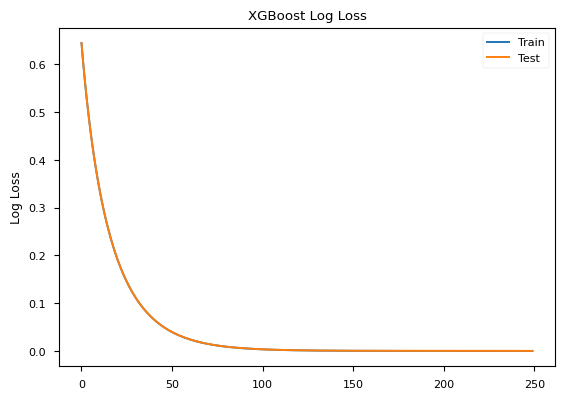

In [16]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()


In [17]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
sklearn.metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    200418
         1.0       1.00      1.00      1.00    199615

    accuracy                           1.00    400033
   macro avg       1.00      1.00      1.00    400033
weighted avg       1.00      1.00      1.00    400033



array([[200410,      8],
       [     4, 199611]])

In [18]:
features_names = [key for key in all_feature.keys() if key!= "Label"]
print(features_names)

['E_pro', 'delta_radius', 'E_del', 'R_delayed', 'delta_time', 'R_prompt', 'Source']


### Shap Interpretability

/home/fcufino/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fcufino/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

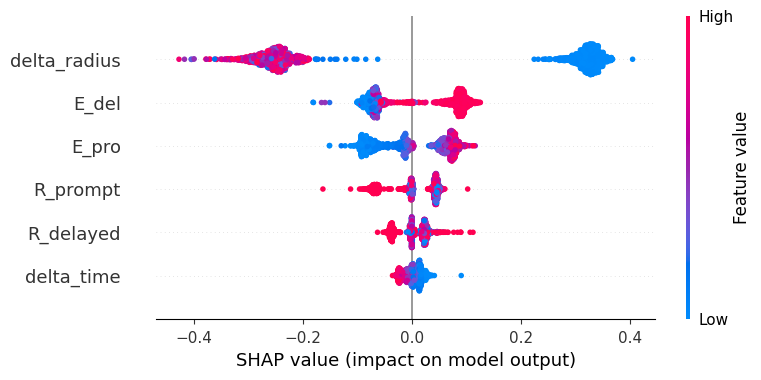

In [19]:
import shap
features_names = X.columns

#Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000],model_output="probability")

# Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
 
# Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names);

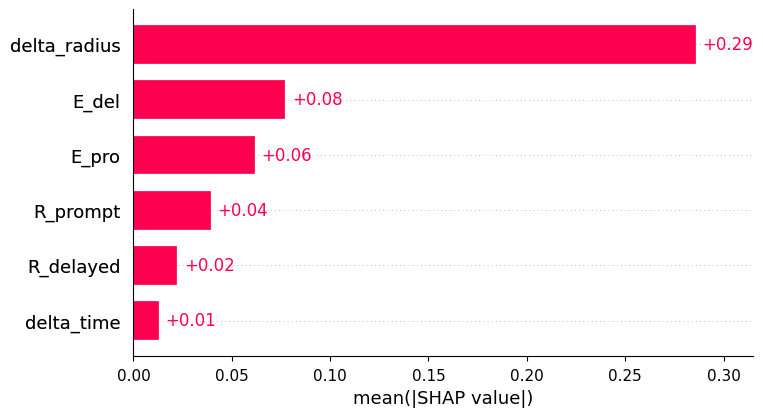

In [20]:
# Importnce plot
shap.plots.bar(shap_values)

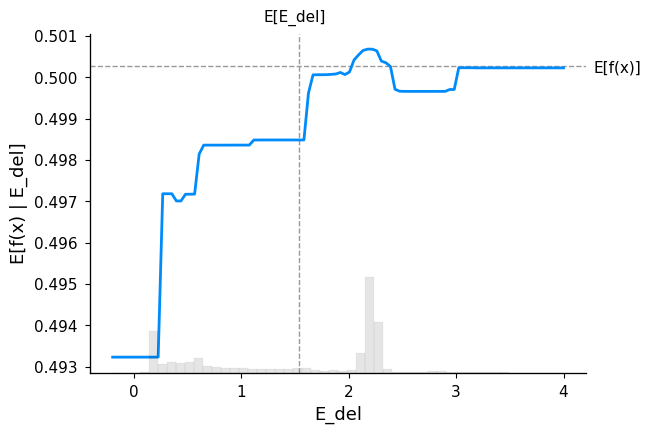

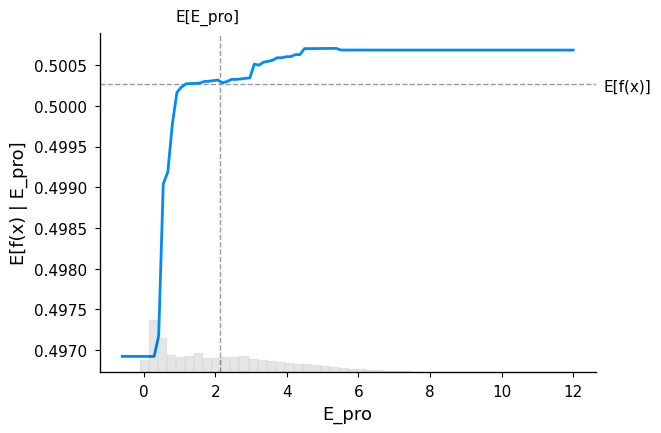

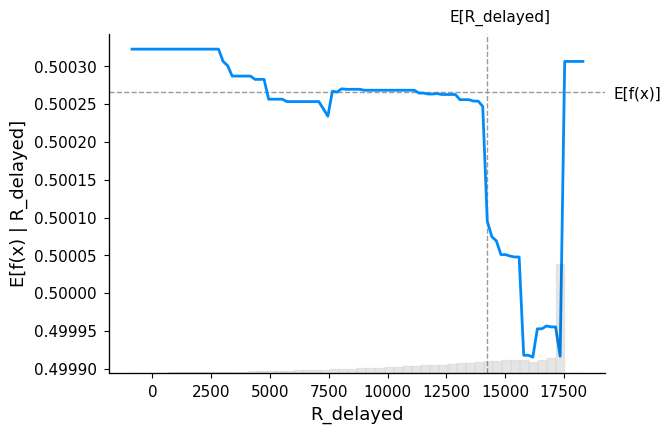

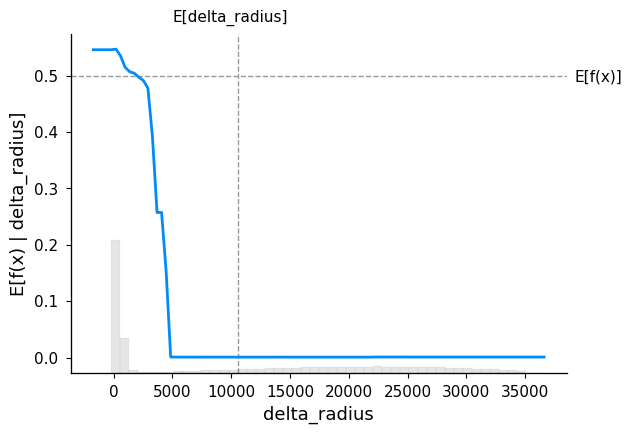

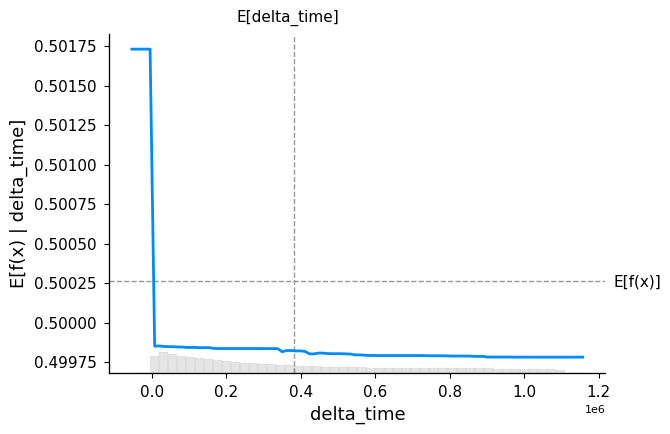

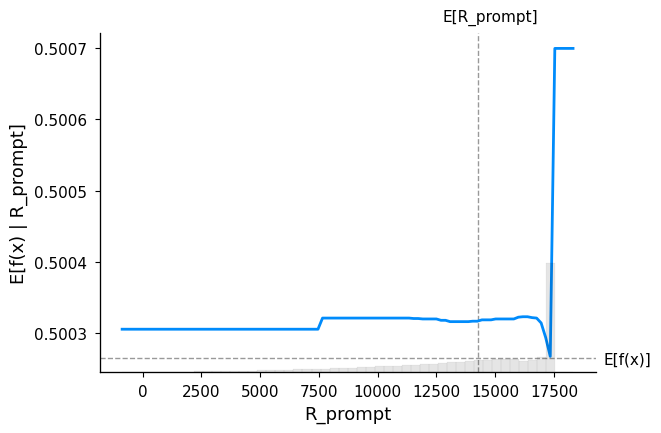

In [21]:
features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]

for idx, feature in enumerate(features):
    
    if feature == "E_del":
        shap.partial_dependence_plot(feature, model.predict, X_train, ice=False,model_expected_value=True, feature_expected_value=True, xmin=0, xmax=4)

    
    elif feature == "E_pro":
        shap.partial_dependence_plot(feature, model.predict, X_train, ice=False,model_expected_value=True, feature_expected_value=True, xmin=0, xmax=12)
        
    else:
        shap.partial_dependence_plot(feature, model.predict, X_train, ice=False,model_expected_value=True, feature_expected_value=True)

    


In [22]:
shap.initjs()

shap.plots.force(shap_values)

In [23]:
shap_values[:, "delta_radius"]

.values =
array([-0.29261779, -0.23880388, -0.28396277, ..., -0.23531536,
       -0.24160555,  0.31211727])

.base_values =
array([0.43999616, 0.43999616, 0.43999616, ..., 0.43999616, 0.43999616,
       0.43999616])

.data =
array([34332.40625   , 20668.953125  , 31929.79296875, ...,
       20511.70117188, 13182.57617188,   621.41411812])

In [24]:
shap_values[10, "delta_radius"].values

-0.2559309942669752

In [25]:
for i in range(len(shap_values[:, "delta_radius"].values)):
    if abs(shap_values[i, "delta_radius"].values) < 0.15 :
        print(i)
        print(shap_values[i])

126
.values =
array([-0.15127302, -0.08455626, -0.1810815 ,  0.00233205, -0.02324318,
       -0.00202234])

.base_values =
0.4399961580069739

.data =
array([1.62995607e-01, 2.24411328e+03, 5.48507214e-01, 1.20950537e+04,
       5.43764000e+05, 1.23883955e+04])
609
.values =
array([-0.09893299, -0.14940242, -0.07554252, -0.00153296, -0.0308755 ,
       -0.08369983])

.base_values =
0.4399961580069739

.data =
array([4.01999831e-01, 3.96081787e+03, 1.38483846e+00, 1.73782520e+04,
       9.29634000e+05, 1.73990000e+04])
811
.values =
array([-0.03431857, -0.06268284, -0.15925511,  0.01355876, -0.03055798,
       -0.16305057])

.base_values =
0.4399961580069739

.data =
array([1.24483287e+00, 1.23179211e+03, 1.14270294e+00, 1.71290781e+04,
       6.77470000e+05, 1.73990000e+04])
832
.values =
array([-0.12951714, -0.10597985, -0.16565938, -0.00697543, -0.02827592,
       -0.00286198])

.base_values =
0.4399961580069739

.data =
array([8.13488424e-01, 2.06790918e+03, 1.11930645e+00, 7.218967

In [26]:

expected_value = explainer.expected_value

predicted_probability = np.zeros(len(shap_values.values))
for i in range(len(shap_values.values)):
    predicted_probability[i] = expected_value + shap_values.values[i].sum()


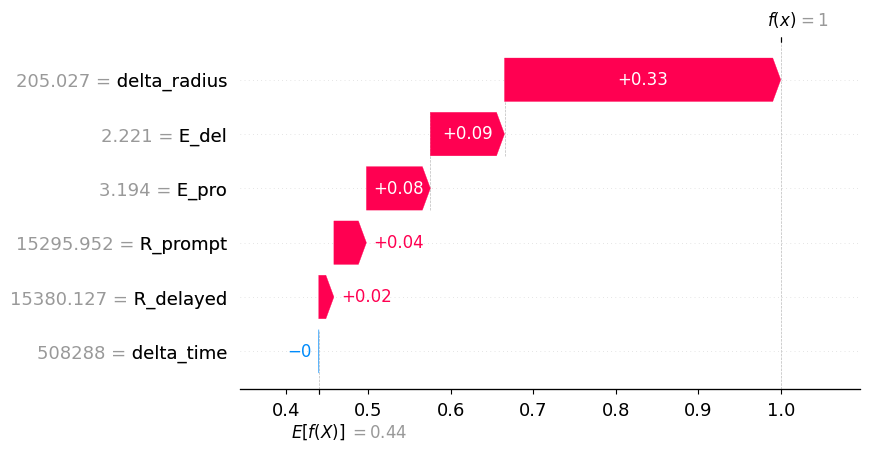

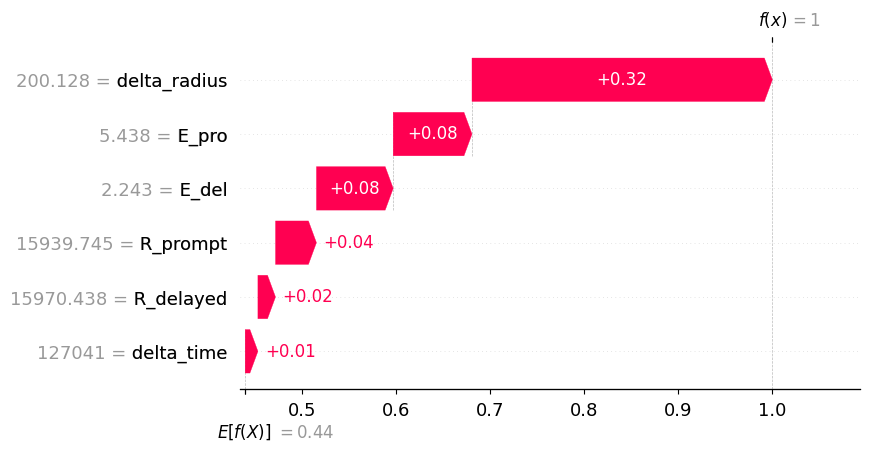

In [27]:
for i in predicted_probability:
    if i > 0.80 and i < 0.90:
        print("IBD,",i)
    elif i > 0.05 and i < 0.15:
        print("BKG,", i)

np.argsort(predicted_probability)[1010]
shap.plots.waterfall(shap_values[1841])
shap.plots.waterfall(shap_values[513])

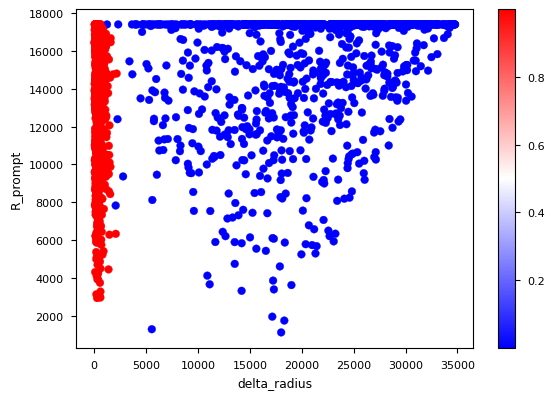

In [28]:
plt.scatter(X_test["delta_radius"][:2000], X_test["R_prompt"][:2000], c=predicted_probability, cmap='bwr')
plt.colorbar()

plt.xlabel("delta_radius")
plt.ylabel("R_prompt")
plt.show()



In [29]:
# features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]
# for feature1 in features:
#     for feature2 in features:
#         shap.plots.scatter(shap_values[:,feature1], dot_size=4, x_jitter=1, color=shap_values[:,feature2])


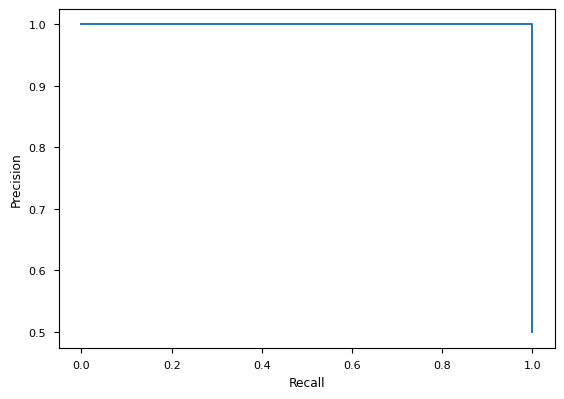

In [30]:
#plot the precision-recall curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()


### Optimizing XGBoost

In [31]:
# from sklearn.model_selection import GridSearchCV 

# #Create values to search over
# cv_params = {'max_depth': [3,4,6], #Maximum depth of a tree, increasing increase complxity
#               'min_child_weight': [1,3,5],
#                 'learning_rate':[0.001, 0.01, 0.1, 0.3]} #Step size uset to prevent overfitting 


# ind_params = {'n_estimators': 300, 'seed':1, 'colsample_bytree': 1, 
#              'objective': 'binary:logistic'}

# opt_XGBclassifier = GridSearchCV(xgb.XGBClassifier(**ind_params), 
#                             cv_params, 
#                             scoring = 'accuracy',
#                             cv = 5,
#                             n_jobs = -1,
#                             verbose=3)

# opt_XGBclassifier.fit(X_train, y_train)
# opt_XGBclassifier.cv_results_

In [32]:
# #Print scores
# print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

# #Find optimal parameters

# print('The optimal parameters for the classifier are:')
# print(opt_XGBclassifier.best_params_)

# #Fit performance on the test set
# XGBclassifier_final=opt_XGBclassifier.best_estimator_
# y_pred_final=XGBclassifier_final.predict(X_test)
# print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
# print("The  AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final)))

### Selezione BDT sul dataset di sola radioattività

In [33]:
all_feature_r = pd.read_csv("../../../../mnt/fcufino/all_features.csv")

In [34]:
X_rad_df = all_feature_r[(all_feature_r["Label"] == 0) & (all_feature_r["Source"] == 0)]
X_rad = X_rad_df.drop(['Label', 'Source'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_rad_pred = model.predict(X_rad)

In [35]:
print(y_rad_pred.sum(), "su", y_rad_pred.shape[0])

TP = np.logical_and(X_rad_df['Label'] == 0, y_rad_pred == 0)
TN = np.logical_and(X_rad_df['Label'] == 1, y_rad_pred == 1)
FN = np.logical_and(X_rad_df["Label"] == 0, y_rad_pred == 1)
FP = np.logical_and(X_rad_df["Label"] == 1, y_rad_pred == 0) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

17 su 993457
Efficiency:  99.99828880364223
Purity:  100.0


### Selezione BDT sul dataset di soli veri IBD

In [36]:
X_true_IBD_df = all_feature_r[(all_feature_r["Label"] == 1) & (all_feature_r["Source"] == 1)]
X_true_IBD = X_true_IBD_df.drop(['Label', 'Source'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_true_IBD_pred = model.predict(X_true_IBD)


In [37]:
print("Venongono selezionati come IBD ", y_true_IBD_pred.sum(),"Su un tot di", y_true_IBD_pred.shape[0])


TP = np.logical_and(X_true_IBD_df['Label'] == 1, y_true_IBD_pred == 1)
TN = np.logical_and(X_true_IBD_df['Label'] == 0, y_true_IBD_pred == 0)
FN = np.logical_and(X_true_IBD_df["Label"] == 1, y_true_IBD_pred == 0)
FP = np.logical_and(X_true_IBD_df["Label"] == 0, y_true_IBD_pred == 1) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

Venongono selezionati come IBD  1468350 Su un tot di 1468385
Efficiency:  99.99761642893384
Purity:  100.0


## PyTorch Neural Network

In [38]:
type(X_train[1:1+4].values)

numpy.ndarray

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# cuda, se disponibile
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definire il DataSet personalizzato
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)
    
# Creare i set di dati personalizzati
train_dataset = CustomDataset(torch.from_numpy(X_train_normed).float(), torch.from_numpy(y_train.values).long())
test_dataset = CustomDataset(torch.from_numpy(X_test_normed).float(), torch.from_numpy(y_test.values).long())

# Creare i DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [40]:
import os
from tqdm import tqdm

# Definire la rete neurale
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # num features from X_train
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, len(y_train.unique()))  # num classes from y_train

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Istanziare la rete e spostarla su cuda  
net = Net().to(device)

# Definire la loss function e l'optimizer
criterion = nn.CrossEntropyLoss()  # Usando la CrossEntropy come funzione di perdita per la classificazione
optimizer = optim.Adam(net.parameters())

model_path = "torch_net_normed_100ep.pth"

# Controllare se esiste un file contenente il modello addestrato
if os.path.isfile(model_path):
    # Caricare il modello
    net.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    net.eval()
    print("Model loaded")
else:
    # Addestrare la rete
    for epoch in tqdm(range(100)):  # 100 epoche
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    print('Finished Training')

    # Salvare il modello
    torch.save(net.state_dict(), model_path)

# Calcolare l'accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs) 
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [1:44:05<00:00, 62.46s/it]


Finished Training
Accuracy of the network on the test data: 99 %


# R vs $\Delta R$

Text(0, 0.5, '$\\Delta$t [ns]')

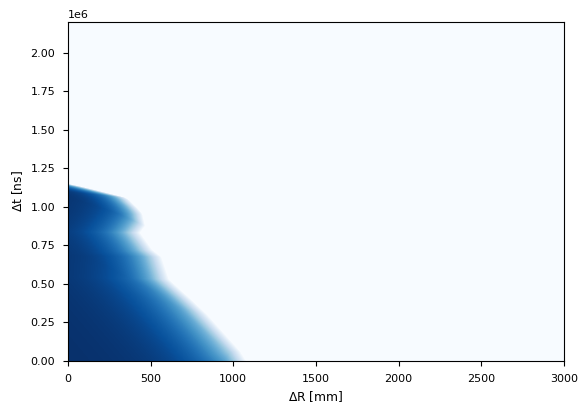

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as nnf

to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
# dt_array = np.linspace(0, 20*220e3, 1000)
dt_array = np.linspace(0, 10*220e3, 1000)
# dr_array = np.linspace(0, 3000, 1000)
# dt_array = np.linspace(0, 20*220e3, 1000)

dr_mesh, dt_mesh = np.meshgrid(dr_array, dt_array)

elements = len(dr_mesh.flatten())
R = 17600
to_plot['R_prompt'] = R*np.ones(elements)
to_plot['R_delayed'] = R*np.ones(elements)
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = dt_mesh.flatten()
to_plot = to_plot[X.columns]
to_plot = scaler.transform(to_plot)
# to_plot['Label'] = np.ones(elements)
# to_plot['Source'] = np.ones(elements)

# probs = net.predict(to_plot)[:, 1].reshape(dr_mesh.shape)

#utilizza net per fare previsione sui dati contenuti in to_plot.
to_plot_tensor = torch.tensor(to_plot, dtype=torch.float32).to('cpu')
probs = net(to_plot_tensor.to('cuda:0')).to('cpu')
probs_normed = nnf.softmax(probs, dim=1).to('cpu')
probs_normed = probs_normed[:, 1].reshape(dr_mesh.shape)

plt.imshow(probs_normed.detach().numpy(), cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), dt_mesh.min(), dt_mesh.max()), aspect = 'auto', vmin = 0.95, vmax = 1)

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'$\Delta$t [ns]')

Text(0, 0.5, '$\\Delta$t [ns]')

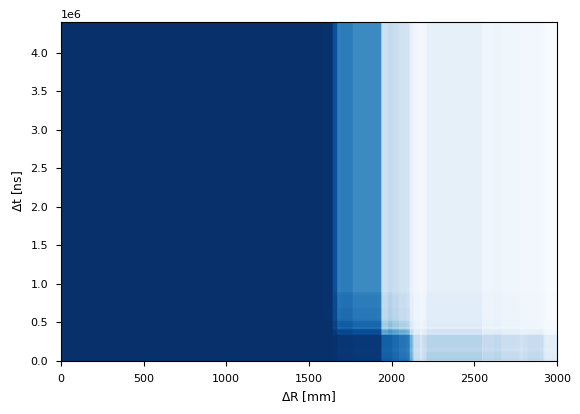

In [42]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
dt_array = np.linspace(0, 20*220e3, 1000)

dr_mesh, dt_mesh = np.meshgrid(dr_array, dt_array)

elements = len(dr_mesh.flatten())
R = 17600
to_plot['R_prompt'] = R*np.ones(elements)
to_plot['R_delayed'] = R*np.ones(elements)
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = dt_mesh.flatten()
to_plot = to_plot[X.columns]

probs = model.predict_proba(to_plot)[:, 1].reshape(dr_mesh.shape)

plt.imshow(probs, cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), dt_mesh.min(), dt_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'$\Delta$t [ns]')

The following kwargs were not used by contour: 'aspect'


Text(0, 0.5, 'R [mm]')

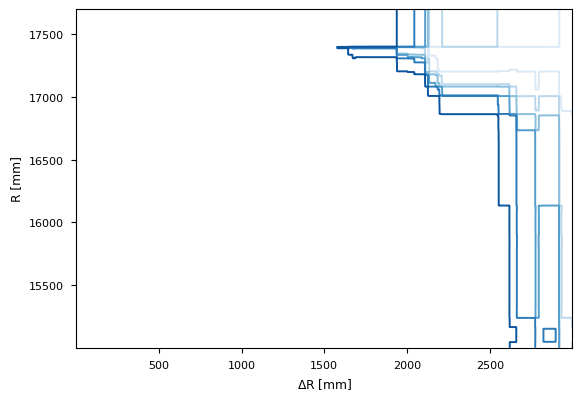

In [43]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
R_array = np.linspace(15000, 17700, 1000)

dr_mesh, R_mesh = np.meshgrid(dr_array, R_array)

elements = len(dr_mesh.flatten())
to_plot['R_prompt'] = R_mesh.flatten()
to_plot['R_delayed'] = to_plot['R_prompt']
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = 220e3
to_plot = to_plot[X.columns]

probs = model.predict_proba(to_plot)[:, 1].reshape(dr_mesh.shape)

plt.contour(probs, cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), R_mesh.min(), R_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'R [mm]')

The following kwargs were not used by contour: 'aspect'


Text(0, 0.5, 'R [mm]')

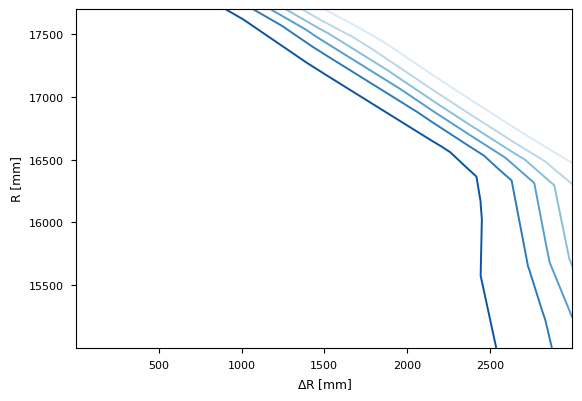

In [44]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
R_array = np.linspace(15000, 17700, 1000)

dr_mesh, R_mesh = np.meshgrid(dr_array, R_array)

elements = len(dr_mesh.flatten())
to_plot['R_prompt'] = R_mesh.flatten()
to_plot['R_delayed'] = to_plot['R_prompt']
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = 220e3
to_plot = to_plot[X.columns]
to_plot = scaler.transform(to_plot)


#utilizza net per fare previsione sui dati contenuti in to_plot.
to_plot_tensor = torch.tensor(to_plot, dtype=torch.float32).to('cpu')
probs = net(to_plot_tensor.to('cuda:0')).to('cpu')
probs_normed = nnf.softmax(probs, dim=1).to('cpu')
probs_normed = probs_normed[:, 1].reshape(dr_mesh.shape)

plt.contour(probs_normed.detach().numpy(), cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), R_mesh.min(), R_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'R [mm]')